In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.gridspec as gridspec

import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import iris
import iris.plot as iplt

/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/matplotlib/ticker.py:1693: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


### Load the data

In [2]:
# Upload SST reconstruct (~observations)
file_obs = ('/nfs/see-fs-01_users/mlzp121/ee22kvcs/NOAAERSSTv5_1870_2018_monthly_sst_no_annual_cycle_detrended_regridded.nc')
sst_obs_constraint = iris.Constraint(cube_func=lambda cube: cube.var_name == 'sst')
cube_obs = iris.load_cube(file_obs,sst_obs_constraint)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to 

In [3]:
#Define constraints for iris cubes
constraints = [iris.Constraint(cube_func=lambda cube: cube.var_name == 'tos'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'TS'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'THO'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'temp'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'tos'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'tos'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'sst')]

In [4]:
# Upload MP (Eoi400) simulations 
path = '/nfs/hera1/ee22kvcs/'
models = [ 'CCSM4Utr', 'CESM1.2', 'COSMOS', 'HadCM3', 'IPSLCM6A', 'MIROC4m', 'NorESML']
names_models_mp = ['0-200_timeseries_CCSM4Utr','501-1099_timeseries_CESM1.2','2300-2799_timeseries_COSMOS',
                '2001-2501_timeseries_HadCM3','1850-2049_timeseries_IPSLCM6A','0-500_timeseries_MIROC4m',
                '1001-1200_timeseries_NorESML']
MP_models = []
for i in range(np.size(models)):
    uploaded_cubes = iris.load_cube(path+'EOI400.SST.'+names_models_mp[i]+'_no_ann_cycle.nc', constraints[i])
    if i == 2:
        uploaded_cubes = uploaded_cubes[:, 0, :, :]
    else:
        uploaded_cubes = uploaded_cubes
    MP_models.append(uploaded_cubes)

#print(MP_models)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to 

In [5]:
# # Upload PI (E280) simulations
path = '/nfs/hera1/ee22kvcs/'
models = [ 'CCSM4Utr', 'CESM1.2', 'COSMOS', 'HadCM3', 'IPSLCM6A', 'MIROC4m', 'NorESML']
names_models_pi = ['0-200_timeseries_CCSM4Utr','501-806_timeseries_CESM1.2','2300-2799_timeseries_COSMOS',
                '2411-2911_timeseries_HadCM3','2850-3049_timeseries_IPSLCM6A','0-500_timeseries_MIROC4m',
                '0-200_timeseries_NorESML']
PI_models = []
for i in range(np.size(models)):
    uploaded_cubes = iris.load_cube(path+'E280.SST.'+names_models_pi[i]+'_no_ann_cycle.nc', constraints[i])
    if i == 2:
        uploaded_cubes = uploaded_cubes[:, 0, :, :]
    else:
        uploaded_cubes = uploaded_cubes
    PI_models.append(uploaded_cubes)

#print(PI_models)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to 

### Define spatial boundaries

In [6]:
# Set bounds used for the whole Pacific
min_lat = -60
max_lat = 70
min_lon = 120
max_lon = 290

# Define 2 functions to identify the lats and lons within the bounds above
def pacific_lat(input):
    return min_lat  <= input <= max_lat 

def pacific_lon(input):
    return min_lon  <= input <= max_lon 

# Set the constraint
pacific_con = iris.Constraint(latitude = pacific_lat, longitude = pacific_lon)

pacific_obs = pacific_con.extract(cube_obs)

pacific_mp_subset = []
for i in MP_models:
    pacific_mp_sub = pacific_con.extract(i)
    pacific_mp_subset.append(pacific_mp_sub)
    
pacific_pi_subset = []
for j in PI_models:
    pacific_pi_sub = pacific_con.extract(j)
    pacific_pi_subset.append(pacific_pi_sub)

### Calculating the variance (Figure S1)

In [7]:
var_mp = []
var_pi = []
var_obs = pacific_obs.collapsed('time', iris.analysis.VARIANCE)

for mod in range(np.size(PI_models)):
    variance_mp = pacific_mp_subset[mod].collapsed('time', iris.analysis.VARIANCE)
    variance_pi = pacific_pi_subset[mod].collapsed('time', iris.analysis.VARIANCE)
    var_mp.append(variance_mp)
    var_pi.append(variance_pi)
    
#join PI with NOAAERSSTv5 
var_pi_obs = var_pi + [var_obs]

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'month'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))


/nfs/see-fs-01_users/mlzp121/.local/lib/python3.5/site-packages/numpy/ma/core.py:3337: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  _data[indx] = dval
/nfs/see-fs-01_users/mlzp121/.local/lib/python3.5/site-packages/numpy/ma/core.py:3340: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  _mask[indx] = mval


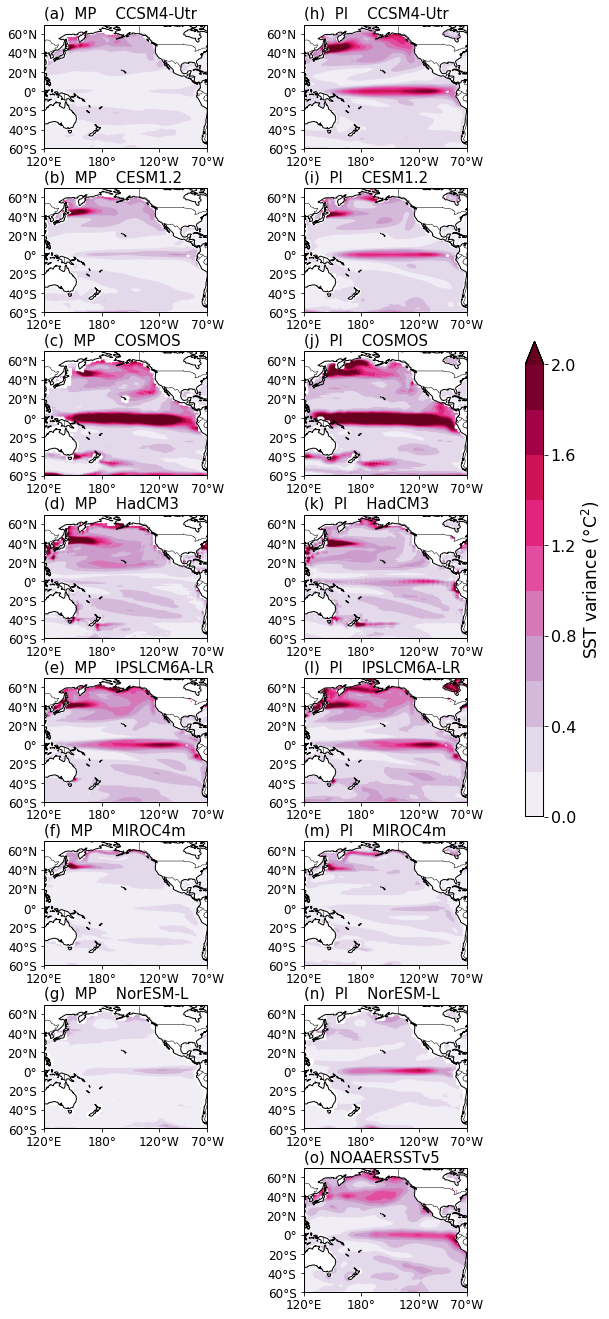

In [8]:
### Plot
#Setup the figure and axes
fig = plt.figure(figsize=(9, 22))
gs = gridspec.GridSpec(8, 2, width_ratios=[4, 3.5])

axes1 = []
for i in range(np.size(var_mp)):
    ax = plt.subplot(gs[i, 0], projection=ccrs.PlateCarree(central_longitude=180.0))
    axes1.append(ax)

axes2 = []
for i in range(np.size(var_pi_obs)):
    ax = plt.subplot(gs[i, 1], projection=ccrs.PlateCarree(central_longitude=180.0))
    axes2.append(ax)

mp_models = ['CCSM4-Utr', 'CESM1.2', 'COSMOS','HadCM3', 'IPSLCM6A-LR', 'MIROC4m','NorESM-L']
pi_obs_models = ['CCSM4-Utr', 'CESM1.2', 'COSMOS','HadCM3', 'IPSLCM6A-LR', 'MIROC4m', 'NorESM-L', 'NOAAERSSTv5']
letters_mp = ['(a) ','(b) ','(c) ','(d) ','(e) ','(f) ', '(g) ']
letters_pi = ['(h) ','(i) ','(j) ','(k) ','(l) ','(m) ', '(n) ', '(o) ']

# First column
for (ax, n, l, name) in zip(axes1, range(np.size(mp_models)), letters_mp, mp_models):
    ax.add_feature(cartopy.feature.BORDERS, linewidth = 0.5)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_yticks(np.arange(-60, 80, 20))
    ax.tick_params(axis='y', labelsize=12)
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    ax.set_xticks([120, 180, 240, 290], crs=ccrs.PlateCarree())
    ax.set_xticklabels(['120°E', '180°', '120°W', '70°W'])
    ax.tick_params(axis='x', labelsize=12)
    
    im = iplt.contourf(var_mp[n], axes = ax, levels = np.arange(0, 2+.2,.2), cmap = 'PuRd', extend = 'max')
    
    ax.set_title(l+ ' MP    '+ name, fontsize=15, loc='left')
    
# Second column
for (ax, n, l, name) in zip(axes2, range(np.size(pi_obs_models)), letters_pi, pi_obs_models):
    ax.add_feature(cartopy.feature.BORDERS, linewidth = 0.5)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_yticks(np.arange(-60, 80, 20))
    ax.tick_params(axis='y', labelsize=12)
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    ax.set_xticks([120, 180, 240, 290], crs=ccrs.PlateCarree())
    ax.set_xticklabels(['120°E', '180°', '120°W', '70°W'])
    ax.tick_params(axis='x', labelsize=12)
    
    im = iplt.contourf(var_pi_obs[n], axes = ax, levels = np.arange(0, 2+.2,.2), cmap = 'PuRd', extend = 'max')
    
    if name == 'NOAAERSSTv5':
        ax.set_title(l+ name, fontsize=15, loc='left')
    else:
        ax.set_title(l+ ' PI    '+ name, fontsize=15, loc='left')
    
    cbar_ax = fig.add_axes([0.93, 0.4, 0.028, 0.3])#[left, bottom, width, height]
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.ax.set_ylabel('SST variance (°C$^2$)', size =17)
    cbar.ax.tick_params(labelsize=16)
    
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.000,hspace=0.32)
#plt.savefig('/nfs/see-fs-01_users/mlzp121/ee22kvcs/Task4/variance_Pacific.png', bbox_inches = 'tight', dpi=300, format='png')
plt.show()

### (MP-PI) variance (Figure S2)

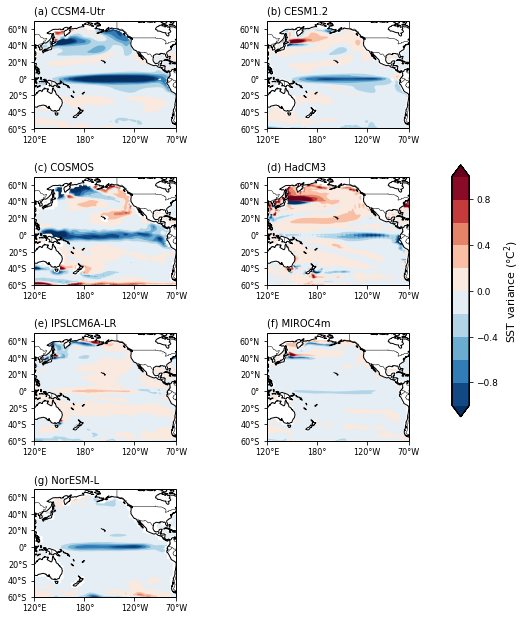

In [9]:
### Plot differences
#Setup the figure and axes
fig = plt.figure(figsize=(8, 10))
all_models = ['CCSM4-Utr', 'CESM1.2', 'COSMOS','HadCM3', 'IPSLCM6A-LR', 'MIROC4m','NorESM-L']
letters = ['(a) ','(b) ','(c) ','(d) ','(e) ','(f) ', '(g) ']

axes1 = []
for i in range(1,8):
    ax = fig.add_subplot(4, 2, i, projection=ccrs.PlateCarree(central_longitude=180.0, globe=None))
    axes1.append(ax)

##Plot
for (ax, n, l, name) in zip(axes1, range(np.size(all_models)), letters, all_models):
    ax.add_feature(cartopy.feature.BORDERS, linewidth = 0.5)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_yticks(np.arange(-60, 80, 20))
    ax.tick_params(axis='y', labelsize=8)
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    ax.set_xticks([120, 180, 240, 290], crs=ccrs.PlateCarree())
    ax.set_xticklabels(['120°E', '180°', '120°W', '70°W'])
    ax.tick_params(axis='x', labelsize=8)
    
    im = iplt.contourf((var_mp[n]-var_pi[n]), axes = ax, levels = np.arange(-1, 1+.2,.2), cmap = 'RdBu_r', extend = 'both')
    
    ax.set_title(l+name, fontsize=10, loc='left')
    
    cbar_ax = fig.add_axes([0.9, 0.35, 0.03, 0.35])#[left, bottom, width, height]
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.ax.set_ylabel('SST variance (°C$^2$)', size =11)
    cbar.ax.tick_params(labelsize=9)
    
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.02,hspace=0.45)
    
#plt.savefig('/nfs/see-fs-01_users/mlzp121/ee22kvcs/Task4/variance_Pacific_differences.png', bbox_inches = 'tight', dpi=300, format='png')
plt.show()

### Calculate the intermodel spread

In [10]:
sig_dif = []

for n in range(len(all_models)):
    difference = var_mp[n].data - var_pi[n].data
    # 1 corresponds to (+) differences, -1 to (-) differences, 0 to no differences
    signed_diff = np.where(difference > 0, 1, np.where(difference < 0, -1, 0))
    sig_dif.append(signed_diff)
    
# Sum
sum_sig_dif = np.sum(sig_dif, axis=0)
# Convert to a cube
sum_sig_dif_cube = var_mp[0].copy(data=sum_sig_dif)

### MMM variance and differences (Figure 1)

In [11]:
## Means
MMM_mp = sum([var_mp[i].data for i in range(7)])/7
MMM_pi = sum([var_pi[i].data for i in range(7)])/7
MMM_dif = MMM_mp - MMM_pi

## Convert the array to iris cubes
MMM_mp_cube = var_mp[0].copy(data=MMM_mp)
MMM_pi_cube = var_pi[0].copy(data=MMM_pi)
MMM_dif_cube = var_mp[0].copy(data=MMM_dif)

## join NOAAERSSTv5 to all MMM 
obs_and_mmm = [var_obs, MMM_pi_cube, MMM_mp_cube, MMM_dif_cube]

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/cube.py:3091: RuntimeWarning: invalid value encountered in less
  result = np.all(np.abs(self.data - other.data) < 1e-8)


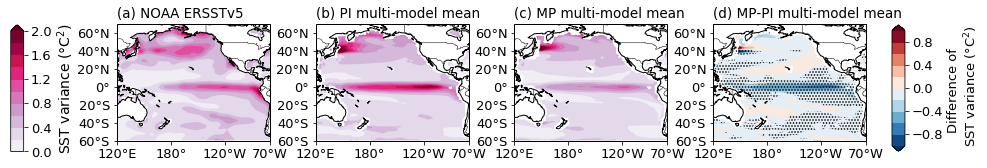

In [12]:
### Plot the EOF1 MMM, dif and NOAAERSSTv5
fig = plt.figure(figsize=(18, 8))
axes = []
for i in range(1,5):
    ax = fig.add_subplot(1, 4, i, projection=ccrs.PlateCarree(central_longitude=180.0, globe=None))
    ax.set_extent([120, 290, -60, 70], crs=ccrs.PlateCarree())
    axes.append(ax)

for (ax,n) in zip(axes, obs_and_mmm):
    ax.add_feature(cartopy.feature.BORDERS, linewidth = 0.5)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_yticks(np.arange(-60, 80, 20))
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    ax.set_xticks([120, 180, 240, 290], crs=ccrs.PlateCarree())
    ax.set_xticklabels(['120°E', '180°', '120°W', '70°W'])
    ax.tick_params(axis='x', labelsize=13)
    ax.tick_params(axis='y', labelsize=13)
    
    if n == var_obs:
        ax.set_title('(a) NOAA ERSSTv5', fontsize=13.5, loc='left')
    elif n == MMM_pi_cube:
        ax.set_title('(b) PI multi-model mean', fontsize=13.5, loc='left')
    elif n == MMM_mp_cube:
        ax.set_title('(c) MP multi-model mean', fontsize=13.5, loc='left')
    elif n == MMM_dif_cube:
        ax.set_title('(d) MP-PI multi-model mean', fontsize=13.5, loc='left')
    
    if n == MMM_dif_cube:
        im = iplt.contourf(MMM_dif_cube, levels = np.arange(-1, 1+.2,.2), axes = ax, cmap = 'RdBu_r', extend = 'both')
        # Add hatching where sum_signed_differences_cube is greater than 5 or less than -5
        iplt.contourf(sum_sig_dif_cube, levels=[5, 7], colors='none', hatches=['....'], axes=ax)
        iplt.contourf(sum_sig_dif_cube, levels=[-7, -5],colors='none', hatches=['....'], axes=ax)
    else:
        im = iplt.contourf(n, levels = np.arange(0, 2+.2,.2), axes = ax, cmap = 'PuRd', extend = 'max')
           
    cbar_ax1 = fig.add_axes([0.14, 0.38, 0.01, 0.22])#[left, bottom, width, height]
    cbar_ax2 = fig.add_axes([0.82, 0.38, 0.01, 0.22])#[left, bottom, width, height]
    fig.subplots_adjust(right=0.8)
    
    if n == MMM_pi_cube:
        cbar1 = fig.colorbar(im, cax=cbar_ax1, orientation='vertical')
        cbar1.ax.tick_params(labelsize=13)
        plt.subplots_adjust(left=0.222,bottom=0.1,right=1,top=0.9,wspace=0.3,hspace=0.07)
        cbar1.ax.set_ylabel('SST variance (°C$^2$)', size =14)
    elif n == MMM_dif_cube:
        cbar2 = fig.colorbar(im, cax=cbar_ax2, orientation='vertical')
        cbar2.ax.tick_params(labelsize=13)
        cbar2.ax.set_ylabel('Difference of \n SST variance (°C$^2$)', size =13) 
    
#plt.savefig('/nfs/see-fs-01_users/mlzp121/ee22kvcs/Task4/MMM_variance_mmm_wspread4.png', bbox_inches = 'tight', dpi=300, format='png')
plt.show()

### Calulate the spatial mean variance (Table 2)

In [13]:
# Calculate the spatial mean variance
## Whole Pacific
var_mp_wm = []
var_pi_wm = []
var_obs_wm = pacific_obs.collapsed('time', iris.analysis.VARIANCE)
var_obs_wm = var_obs_wm.collapsed(('latitude', 'longitude'), iris.analysis.MEAN)

for mod in range(np.size(pacific_mp_subset)):
    variance_mp = pacific_mp_subset[mod].collapsed('time', iris.analysis.VARIANCE)
    variance_mp_m = variance_mp.collapsed(('latitude', 'longitude'), iris.analysis.MEAN)
    variance_pi = pacific_pi_subset[mod].collapsed('time', iris.analysis.VARIANCE)
    variance_pi_m = variance_pi.collapsed(('latitude', 'longitude'), iris.analysis.MEAN)
    var_mp_wm.append(variance_mp_m)
    var_pi_wm.append(variance_pi_m)

## Print results
print('Absolute difference:')
for mod in range(np.size(pacific_mp_subset)):
    var_dif = var_mp_wm[mod].data-var_pi_wm[mod].data
    print(np.round(var_dif, decimals=2))
    
print('Relative difference:')
for mod in range(np.size(pacific_mp_subset)):
    var_dif_r = (var_mp_wm[mod].data-var_pi_wm[mod].data)/var_pi_wm[mod].data*100
    print(np.round(var_dif_r, decimals=0))

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/cube.py:3281: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/py

Absolute difference:
-0.2
-0.08
-0.11
0.03
-0.05
-0.05
-0.1
Relative difference:
-46.0
-22.0
-14.0
7.0
-9.0
-21.0
-37.0


In [14]:
## Tropical Pacific
# Set bounds used for the whole Pacific plots
min_lat = -20
max_lat = 20
min_lon = 150
max_lon = 280

# Define 2 functions to identify the lats and lons within the bounds above
def tropical_lat(input):
    return min_lat  <= input <= max_lat 

def tropical_long(input):
    return min_lon  <= input <= max_lon 

# Set the constraint
tropical_con = iris.Constraint(latitude = tropical_lat, longitude = tropical_long)
tropical_obs = tropical_con.extract(cube_obs)

tropical_mp_subset = []
for i in MP_models:
    tropical_mp_sub = tropical_con.extract(i)
    tropical_mp_subset.append(tropical_mp_sub)
    
tropical_pi_subset = []
for j in PI_models:
    tropical_pi_sub = tropical_con.extract(j)
    tropical_pi_subset.append(tropical_pi_sub)

In [15]:
# Calculate the spatial mean variance
## Tropical Pacific
var_mp_tm = []
var_pi_tm = []
var_obs_tm = tropical_obs.collapsed('time', iris.analysis.VARIANCE)
var_obs_tm = var_obs_tm.collapsed(('latitude', 'longitude'), iris.analysis.MEAN)

for mod in range(np.size(MP_models)):
    variance_mp = tropical_mp_subset[mod].collapsed('time', iris.analysis.VARIANCE)
    variance_mp_m = variance_mp.collapsed(('latitude', 'longitude'), iris.analysis.MEAN)
    variance_pi = tropical_pi_subset[mod].collapsed('time', iris.analysis.VARIANCE)
    variance_pi_m = variance_pi.collapsed(('latitude', 'longitude'), iris.analysis.MEAN)
    var_mp_tm.append(variance_mp_m)
    var_pi_tm.append(variance_pi_m)

## Print results
print('Absolute difference:')
for mod in range(np.size(MP_models)):
    var_dif = var_mp_tm[mod].data-var_pi_tm[mod].data
    print(np.round(var_dif, decimals=2))
    
print('Relative difference:')
for mod in range(np.size(MP_models)):
    var_dif_r = (var_mp_tm[mod].data-var_pi_tm[mod].data)/var_pi_tm[mod].data*100
    print(np.round(var_dif_r, decimals=0))

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/cube.py:3281: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/py

Absolute difference:
-0.34
-0.17
-0.24
-0.07
0.01
-0.09
-0.2
Relative difference:
-70.0
-46.0
-20.0
-16.0
1.0
-41.0
-56.0


In [16]:
## North Pacific
# Delimt the region for the cube
min_lat = 20.0
max_lat = 70.0
min_lon = 120.0
max_lon = 240.0

# Functions to identify latitudes and longitudes we want to subset to
def pdo_lat(input):
    return min_lat  <= input <= max_lat 
def pdo_lon(input):
    return min_lon  <= input <= max_lon 

pdo_con = iris.Constraint(latitude = pdo_lat, longitude = pdo_lon)

pdo_mp_subset = []
for i in MP_models:
    pdo_mp_sub = pdo_con.extract(i)
    pdo_mp_subset.append(pdo_mp_sub)
    
pdo_pi_subset = []
for j in PI_models:
    pdo_pi_sub = pdo_con.extract(j)
    pdo_pi_subset.append(pdo_pi_sub)

pdo_obs_subset = pdo_con.extract(cube_obs)

In [17]:
# Calculate the spatial mean variance
## North Pacific
var_mp_pm = []
var_pi_pm = []
var_obs_pm = pdo_obs_subset.collapsed('time', iris.analysis.VARIANCE)
var_obs_pm = var_obs_pm.collapsed(('latitude', 'longitude'), iris.analysis.MEAN)

for mod in range(np.size(MP_models)):
    variance_mp = pdo_mp_subset[mod].collapsed('time', iris.analysis.VARIANCE)
    variance_mp_m = variance_mp.collapsed(('latitude', 'longitude'), iris.analysis.MEAN)
    variance_pi = pdo_pi_subset[mod].collapsed('time', iris.analysis.VARIANCE)
    variance_pi_m = variance_pi.collapsed(('latitude', 'longitude'), iris.analysis.MEAN)
    var_mp_pm.append(variance_mp_m)
    var_pi_pm.append(variance_pi_m)

## Print results
print('Absolute difference:')
for mod in range(np.size(MP_models)):
    var_dif = var_mp_pm[mod].data-var_pi_pm[mod].data
    print(np.round(var_dif, decimals=2))
    
print('Relative difference:')
for mod in range(np.size(MP_models)):
    var_dif_r = (var_mp_pm[mod].data-var_pi_pm[mod].data)/var_pi_pm[mod].data*100
    print(np.round(var_dif_r, decimals=0))

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/cube.py:3281: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/py

Absolute difference:
-0.29
0.01
-0.08
0.22
-0.08
-0.03
-0.07
Relative difference:
-39.0
2.0
-10.0
30.0
-9.0
-8.0
-23.0
